# **Entendimiento del Negocio y Carga de Datos**
---

Este notebook es una plantilla que le puede servir como guía para el primer entregable del proyecto aplicado.

## **1. Marco de Proyecto**
---

Normalmente, se suele construir un marco de proyecto para mostrar los resultados del entendimiento del negocio, es decir, debemos dar respuesta a los siguientes elementos:

### **1.1. Trasfondo del Negocio**
---



- ¿Quién es el cliente o los beneficiarios del proyecto?
El proyecto se enfonca en construir un modelo de clasificación, que permita identificar si un rostro de una persona es verdadero o falso, mediante el análisis de imágenes. Este sería un producto que se puede utilizar para reconocer perfiles falsos en redes sociales, mejorar las aplicaciones de reconocimiento facial, evitar la suplatación de identidades o la difusión de noticias falsas.

- ¿En qué dominio se encuentran (marketing, medicina, entre otros)?
El producto del proyecto descrito, se encuentra bajo distintos dominios, ya que, tiene muchas aplicaciones, por ejemplo, podría estar en el sector Bancario o de seguridad, en relación con las aplicaciones de reconocimiento facial, o también podría utilizarse tanto por medios de comunicación como entidades del estado para desmentir imagénes que respalden noticias falsas.

### **1.2. Alcance**
---

- ¿Qué  solución basada en _Deep Learning_ queremos implementar?

  Se va a cosnstruir un modelo de clasificación, que sea capaz de indentificar si la imágen del rostro de una persona, es verdader o es falsa. Para esto se va a utilizar una arquitectura de redes neuronales convolucionales, en la que se va utilizar una arquitectura base como Resnet 50 y la última sección de la arquitectura va a ser la que se agrega para personalizar el modelo a hacer la clasificación de rostros falsos y verdaderos.

- ¿Qué  se hará?
 Un análisis exploratorio de las imágenes, para revisar, su tamaño, calidad e identificar principalmente si el conjunto de datos esta balanceado, es decir, que la cantidad de imágenes etiquetadas como rostros falsos, sea proporcional al número de imágenes marcadas como rostros verdaderos.

  En caso, de que la cantidad de imágenes entre clases no sea similar, se puede trabajar con una muestra de los datos o revisar técnicas de balanceo, con el fin de contar con un conjunto de datos equilibrado.

  Posteriormente se aplican las transformaciones, a los datos. En este caso, como son imágenes, estan deben escalarse entre uno y cero. Para esto, se van a utilizar bibliotecas de procesamiento como keras_preprocessing.image y se construye un generador de imágenes, que se encargue de hacer el escalado.

  Consecutivamente, se van a utilizar arquitecturas de redes neuronales convolucionales, como Resnet50, para construir la base del modelo. Y posteriormente, se van a elaborar las capas superiores del modelo, de manera personalizada, para realizar la clasificación binaria entre imágenes falsas y verdaderas. Entonces, se utilizarán modelos pre-entrenados y la técnica de aprendizaje por transferencia, con el fin de obtener mejores resultados en la clasificación.

- ¿De qué forma el cliente o beneficiario utilizará el producto del proyecto?

  El modelo, se puede colocar en producción mediante un API para realizar la tarea de clasificación de imágenes en el proceso que se necesite, dependieno la aplicación que se le desee dar.

### **1.3. Plan**
---

Puede agregar una lista de actividades con tiempos estimados, un diagrama de Gantt o integrar alguna herramienta de gestión de proyectos para mostrar la planeación del proyecto.

#Actividades a realizar por semana:

Semana 1: Definición y Planificación Inicial

    Definición de Objetivos y Alcance: Establecer objetivos específicos para la clasificación de imágenes de rostros en reales y falsas.

    Definir el alcance del proyecto y las métricas clave de éxito.
    
    Diseño de Arquitectura Simplificado:Esbozar una arquitectura básica del sistema, destacando las fases de recopilación, procesamiento y detección.

Semana 2: Preparación de Datos y Desarrollo Inicial

    Identificación de Fuentes de Datos y Extracción: Identificar fuentes de datos accesibles y relevantes.

    Extraer un conjunto de imágenes para realizar el entranamiento del modelo.
    
    Preprocesamiento de Datos Simplificado: Escalar las imágenes a valores entre cero y uno.

    Desarrollo Inicial del Modelo:
       - Seleccionar distintos tipos de arquitecturas de redes neuronales convolucionales, para hacer la construcción de la base del modelo.
       - Construir la capa top de la arquitectura de redes neuronales convocionales.

Semana 3: Refinamiento del Modelo y Evaluación Preliminar

    Entrenamiento y Ajuste del Modelo:Realizar el entrenamiento con distintas arquitecturas utilizando el concepto de aprendizaje por transferencia.

    Realizar ajustes preliminares en base a la evaluación inicial.

    Evaluación Preliminar de Rendimiento:Evaluar el rendimiento del modelo con un conjunto de datos de prueba.

    Identificar posibles áreas de mejora.

Semana 4: Documentación

    Consolidar en un único notebook los avances presentados en las anteriores entregas y realización del vídeo.

## **2. Datos**
---

En esta sección debe adjuntar una descripción de los datos y agregar el código que permite su tratamiento.

### **2.1. Origen**
---

- ¿De dónde vienen los datos?

    Los datos fueron tomados de kaggle de la url https://www.kaggle.com/datasets/manjilkarki/deepfake-and-real-images, pero la fuente orginal es https://zenodo.org/records/5528418#.YpdlS2hBzDd.
    
    OpenForensics se destaca como el primer conjunto de datos a gran escala que presenta desafíos significativos. Este conjunto de datos ha sido elaborado con anotaciones detalladas específicamente para detectar y segmentar la falsificación de rostros. Gracias a estas anotaciones detalladas, OpenForensics ofrece un enorme potencial para investigaciones relacionadas tanto con la prevención de deepfakes como con la detección general de rostros humanos.

- ¿Se usa alguna herramienta o proceso para la descarga de la información?

    No los datos, fueron descargados desde la página https://www.kaggle.com/datasets/manjilkarki/deepfake-and-real-images y fueron subidos en una carpeta en google drive, para luego ser consumidos desde Google Colab.

- ¿Qué tipo de datos estamos manejando?
    Son imágenes en formato .jpg etiquetadas como real y fake.

# **Entendimiento y Preparación de los Datos**
---

## **3. Análisis Exploratorio de los Datos**
---

Normalmente en el análisis exploratorio, se trata de dar respuesta a los siguientes elementos:

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'
!chmod 600 /content/kaggle.json
import zipfile
import tensorflow as tf
from keras import layers
# from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
import numpy as np
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras.callbacks import Callback, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from tensorflow.keras.callbacks import Callback , ReduceLROnPlateau , ModelCheckpoint, CSVLogger
from sklearn.metrics import cohen_kappa_score, accuracy_score
from tensorflow.keras.losses import categorical_crossentropy as logloss
from tensorflow.keras.metrics import categorical_accuracy
import pandas as pd
import os
from PIL import Image
import scipy
from sklearn import metrics
from sklearn.model_selection import train_test_split
import json
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!kaggle datasets download -d manjilkarki/deepfake-and-real-images

100% 1.68G/1.68G [00:19<00:00, 150MB/s]
100% 1.68G/1.68G [00:19<00:00, 91.6MB/s]


In [ ]:
import zipfile

# Ruta del archivo ZIP
zip_file_path = 'deepfake-and-real-images.zip'

# Directorio de destino para la extracción
extract_dir = '/content/dataset'

# Descomprimir el archivo ZIP
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Listar los archivos extraídos
extracted_files = os.listdir(extract_dir)
print("Archivos extraídos:", extracted_files)

Archivos extraídos: ['Dataset']


### **3.1.1. Resumen General**
---

In [ ]:
# Directorio del conjunto de datos
dataset_dir = '/content/dataset/Dataset'

# Contador para el número total de documentos
total_documents = 0

# Conjunto para almacenar los formatos únicos de los documentos
unique_formats = set()

# Función para obtener el tamaño de un archivo o directorio en MB
def get_size_mb(start_path):
    total_size = 0
    for dirpath, _, filenames in os.walk(start_path):
        for f in filenames:
            fp = os.path.join(dirpath, f)
            total_size += os.path.getsize(fp)
    return total_size / (1024 * 1024)

# Recorre todos los archivos en el directorio del conjunto de datos
for root, dirs, files in os.walk(dataset_dir):
    for file in files:
        # Incrementa el contador de documentos
        total_documents += 1
        # Obtiene la extensión del archivo
        file_extension = os.path.splitext(file)[1]
        # Agrega la extensión del archivo al conjunto de formatos únicos
        unique_formats.add(file_extension)

total_size_mb = get_size_mb(dataset_dir)
print("Número total de documentos:", total_documents)
print("Formatos de los documentos:", unique_formats)
print("Tamaño del conjunto en MB:", total_size_mb)

Número total de documentos: 190335
Formatos de los documentos: {'.jpg'}
Tamaño del conjunto en MB: 1719.422212600708


In [ ]:
train_count = 0
val_count = 0
test_count = 0

# Función para contar el número de archivos en un directorio
def count_files(directory):
    count = 0
    for _, _, files in os.walk(directory):
        count += len(files)
    return count

# Obtener el número de datos en cada conjunto
train_count = count_files(os.path.join(dataset_dir, 'Train'))
val_count = count_files(os.path.join(dataset_dir, 'Validation'))
test_count = count_files(os.path.join(dataset_dir, 'Test'))

# Obtener el número total de datos
total_count = train_count + val_count + test_count

print("División de los datos:")
if total_count != 0:
    print("Conjunto de entrenamiento: {} ({}%)".format(train_count, round(train_count / total_count * 100, 2)))
    print("Conjunto de validación: {} ({}%)".format(val_count, round(val_count / total_count * 100, 2)))
    print("Conjunto de prueba: {} ({}%)".format(test_count, round(test_count / total_count * 100, 2)))
else:
    print("No se encontraron datos en el conjunto.")

División de los datos:
Conjunto de entrenamiento: 140002 (73.56%)
Conjunto de validación: 39428 (20.72%)
Conjunto de prueba: 10905 (5.73%)


### **3.1.2. Resumen de la Calidad de los datos**
---

- ¿Hay datos faltantes, documentos vacíos o de mala calidad?
- ¿Existen documentos ilegibles o con problemas de codificación?
- ¿Hay mezcla de formatos en el conjunto?

In [ ]:
from PIL import Image

def check_data_quality(directory):
    empty_files = []
    corrupted_files = []
    mixed_formats = set()

    for root, _, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(root, file)

            # Verificar si el archivo está vacío
            if os.path.getsize(file_path) == 0:
                empty_files.append(file_path)

            # Verificar si el archivo está corrupto o tiene problemas de codificación
            try:
                Image.open(file_path).verify()
            except Exception as e:
                corrupted_files.append((file_path, str(e)))

            # Verificar el formato del archivo
            file_format = os.path.splitext(file)[1]
            mixed_formats.add(file_format)

    return empty_files, corrupted_files, mixed_formats

# Verificar los datos en el conjunto de entrenamiento
train_dir = os.path.join(dataset_dir, 'Train')
train_empty, train_corrupted, train_formats = check_data_quality(train_dir)

# Verificar los datos en el conjunto de validación
val_dir = os.path.join(dataset_dir, 'Validation')
val_empty, val_corrupted, val_formats = check_data_quality(val_dir)

# Verificar los datos en el conjunto de prueba
test_dir = os.path.join(dataset_dir, 'Test')
test_empty, test_corrupted, test_formats = check_data_quality(test_dir)

print("Conjunto de entrenamiento:")
print("Archivos vacíos:", train_empty)
print("Archivos corruptos:", train_corrupted)
print("Formatos mixtos:", train_formats)

print("\nConjunto de validación:")
print("Archivos vacíos:", val_empty)
print("Archivos corruptos:", val_corrupted)
print("Formatos mixtos:", val_formats)

print("\nConjunto de prueba:")
print("Archivos vacíos:", test_empty)
print("Archivos corruptos:", test_corrupted)
print("Formatos mixtos:", test_formats)

Conjunto de entrenamiento:
Archivos vacíos: []
Archivos corruptos: []
Formatos mixtos: {'.jpg'}

Conjunto de validación:
Archivos vacíos: []
Archivos corruptos: []
Formatos mixtos: {'.jpg'}

Conjunto de prueba:
Archivos vacíos: []
Archivos corruptos: []
Formatos mixtos: {'.jpg'}


### **3.1.3. Tipos de variables**
---

- ¿El conjunto de datos tiene una variable objetivo a estimar?, de ser así, ¿es una variable continúa o categórica?
- Analice la distribución de las etiquetas, identifique si hay desbalanceo de datos.
- ¿El conjunto de datos cuenta con otras variables adicionales?, de ser así, debe analizar cuáles se incorporarán en el modelo y hacer un análisis descriptivo de las mismas.

In [ ]:
# Función para contar el número de archivos en un directorio
def count_files(directory):
    count = 0
    for _, _, files in os.walk(directory):
        count += len(files)
    return count

# etiquetas
def analyze_label_distribution(directory):
    label_distribution = {}
    total_files = 0
    for label in os.listdir(directory):
        label_dir = os.path.join(directory, label)
        label_count = count_files(label_dir)
        label_distribution[label] = label_count
        total_files += label_count
    label_distribution_percent = {k: v / total_files for k, v in label_distribution.items()}
    return label_distribution, label_distribution_percent

# Conjunto de entrenamiento
train_dir = os.path.join(dataset_dir, 'Train')
train_label_distribution, train_label_distribution_percent = analyze_label_distribution(train_dir)

# Conjunto de validación
val_dir = os.path.join(dataset_dir, 'Validation')
val_label_distribution, val_label_distribution_percent = analyze_label_distribution(val_dir)

# Conjunto de prueba
test_dir = os.path.join(dataset_dir, 'Test')
test_label_distribution, test_label_distribution_percent = analyze_label_distribution(test_dir)

print("Distribución de etiquetas en el conjunto de entrenamiento:")
print(train_label_distribution)
print(train_label_distribution_percent)

print("\nDistribución de etiquetas en el conjunto de validación:")
print(val_label_distribution)
print(val_label_distribution_percent)

print("\nDistribución de etiquetas en el conjunto de prueba:")
print(test_label_distribution)
print(test_label_distribution_percent)

Distribución de etiquetas en el conjunto de entrenamiento:
{'Real': 70001, 'Fake': 70001}
{'Real': 0.5, 'Fake': 0.5}

Distribución de etiquetas en el conjunto de validación:
{'Real': 19787, 'Fake': 19641}
{'Real': 0.5018514761083493, 'Fake': 0.4981485238916506}

Distribución de etiquetas en el conjunto de prueba:
{'Real': 5413, 'Fake': 5492}
{'Real': 0.49637780834479595, 'Fake': 0.503622191655204}


### **3.1.4. Relación Entre Variables**
---

- Analice si existe alguna relación entre las variables. Puede utilizar medidas de correlación o visualizaciones.
- Identifique si hay redundancia entre las variables para una posterior eliminación o selección.

---**INGRESE SU RESPUESTA**---

## **4. Limpieza de los Datos**
---

La selección de las técnicas de preprocesamiento puede variar en cada conjunto de datos. Recuerde que puede aplicar (no necesariamente todas) las técnicas generales vistas en el curso, dependiendo si está trabajando con imagenes, datos estructurados, textos, etc.

Al trabajar con imagenes debemos enforcarnos en unificar estas y/o resaltar detalles con los diferentes metodos de preprocesamiento de las mismas es por eso y enfocandonos que se necesita tener detalles de las imagenes, ya que intentamos crear un clasificador de imagenes usaremos preprocesamientos enfocados en estos.

In [ ]:
# Seleccionamos la versión más reciente de Tensorflow 2.0
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os, random
%matplotlib inline
plt.style.use("ggplot")
# Seleccionamos una semilla para los RNG
tf.random.set_seed(0)
np.random.seed(0)

In [ ]:
base_dir = '/content/dataset/Dataset'
train_dir = os.path.join(base_dir, 'Test')
validation_dir = os.path.join(base_dir, 'Validation')

# Directorio con las imágenes de gatos para entrenamiento
train_real_dir = os.path.join(train_dir, 'Real')

# Directorio con las imágenes de perros para entrenamiento
train_fake_dir = os.path.join(train_dir, 'Fake')

# Directorio con las imágenes de gatos para validación
validation_real_dir = os.path.join(validation_dir, 'Real')

# Directorio con las imágenes de perros para validación
validation_fake_dir = os.path.join(validation_dir, 'Fake')

In [ ]:
train_real_fnames = os.listdir(train_real_dir)
print(train_real_fnames[:10])

train_fake_fnames = os.listdir(train_fake_dir)
train_fake_fnames.sort()  # Corregir aquí
print(train_fake_fnames[:10])

['real_1846.jpg', 'real_431.jpg', 'real_4339.jpg', 'real_1858.jpg', 'real_1870.jpg', 'real_4997.jpg', 'real_2817.jpg', 'real_3371.jpg', 'real_753.jpg', 'real_282.jpg']
['fake_0.jpg', 'fake_1.jpg', 'fake_10.jpg', 'fake_100.jpg', 'fake_1000.jpg', 'fake_1001.jpg', 'fake_1002.jpg', 'fake_1003.jpg', 'fake_1004.jpg', 'fake_1005.jpg']


In [ ]:
print('Imágenes de gatos en entrenamiento:', len(os.listdir(train_real_dir)))
print('Imágenes de perros en entrenamiento:', len(os.listdir(train_fake_dir)))
print('Imágenes de gatos en validación:', len(os.listdir(validation_real_dir)))
print('Imágenes de perros en validación:', len(os.listdir(validation_fake_dir)))

Imágenes de gatos en entrenamiento: 5413
Imágenes de perros en entrenamiento: 5492
Imágenes de gatos en validación: 19787
Imágenes de perros en validación: 19641


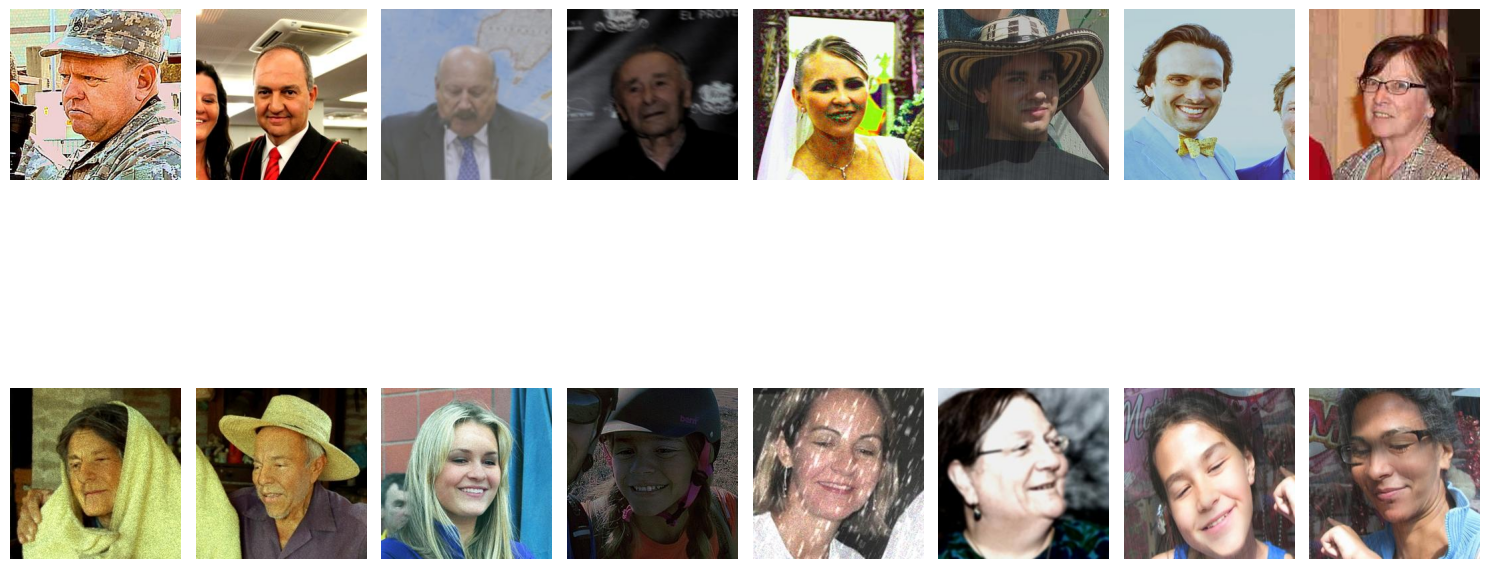

In [ ]:
fig, ax = plt.subplots(2, 8, figsize=(15,10))

# seleccionamos las primeras 8 imágenes de cada categoría
next_cat_pix = [os.path.join(train_real_dir, fname)
                for fname in train_real_fnames [:8]]
next_dog_pix = [os.path.join(train_fake_dir, fname)
                for fname in train_fake_fnames[:8]]

# mostramos las imágenes
for i, img_path in enumerate(next_cat_pix+next_dog_pix):
    img = tf.keras.preprocessing.image.load_img(img_path)
    ax[i//8,i%8].imshow(img)
    ax[i//8,i%8].axis("off")
plt.tight_layout()

In [ ]:
# Definimos las transformaciones para el conjunto de train
import numpy as np
from skimage import exposure

def histogram_equalization(image):
    image = np.array(image)  # Convertir imagen a array NumPy
    image = np.squeeze(image)  # Eliminar la dimensión de canal si es necesario
    image = exposure.equalize_hist(image)
    return image

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=histogram_equalization
  #  fill_mode='constant'
)

# Definimos las transformaciones para el conjunto de test
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [ ]:
# Especificamos el tamaño del batch, número de imagenes que genera en cada iteración
batch_size = 128

# Obtenemos un generador que realiza las transformaciones y carga
# las imágenes de entrenamiento
train_generator = train_datagen.flow_from_directory(directory=train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=batch_size,
                                                    class_mode='binary')

# Obtenemos un generador que realiza las transformaciones y carga
# las imágenes de validación
validation_generator = val_datagen.flow_from_directory(directory=validation_dir,
                                                       target_size=(150, 150),
                                                       batch_size=batch_size,
                                                       class_mode='binary')

Found 10905 images belonging to 2 classes.
Found 39428 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:394: UserWarning:

This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.



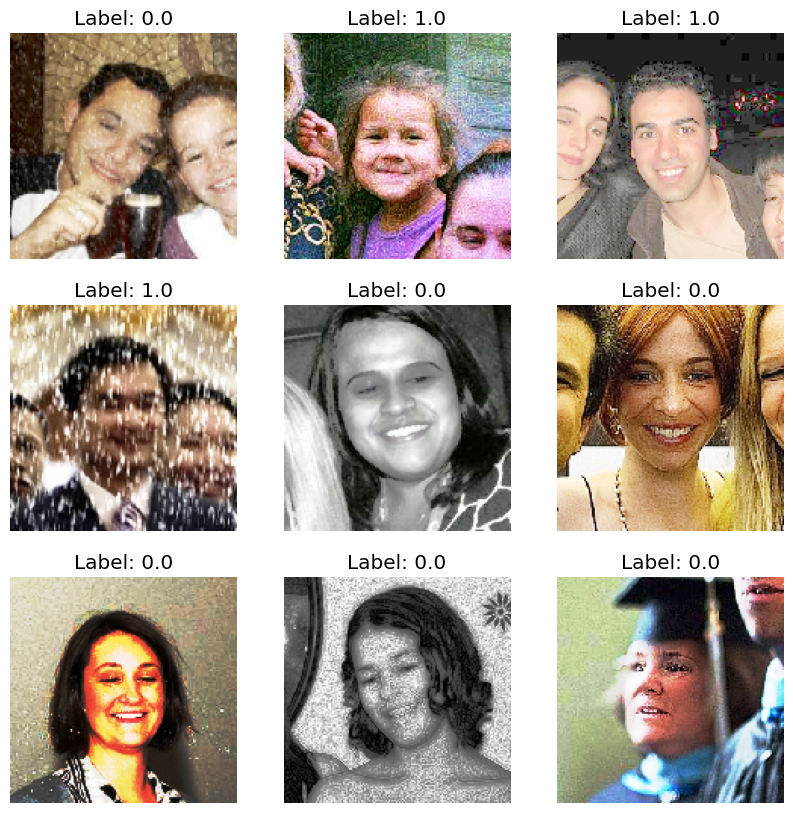

In [ ]:
# Extraemos un batch
ims, lab = next(train_generator)

plt.figure(figsize=(10, 10))
# Mostramos 9 ejemplos
for i in range(9):
    plt.subplot(331+i)
    plt.imshow(ims[i]); plt.axis("off"); plt.title(f"Label: {lab[i]}")

## **5. Implementación de los modelos**
---


### 5.1.1. Definición de las rutas de los conjuntos de Train, Validation y Test

In [ ]:
#Definición de las rutas de los conjuntos de Train, Validation y Test
train_dir = '/content/dataset/Dataset/Train'
valid_dir = '/content/dataset/Dataset/Validation'
test_dir = '/content/dataset/Dataset/Test'

### 5.1.2. Aumentación de datos (Data Augmentation)

In [ ]:
#Se define la semilla para replicar los resultados
tf.random.set_seed(42)

# Definimos el generador de imágenes con las transformaciones para el conjunto de train
train_datagen = ImageDataGenerator(rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
   fill_mode='constant')

# Definimos el generador de imágenes las transformaciones para el conjunto de validación
valid_datagen = ImageDataGenerator(rescale=1./255)

# Definimos el generador de imágenes el conjunto de pruebas
test_datagen = ImageDataGenerator(rescale=1./255)

# Obtenemos un generador que realiza las transformaciones y carga
# las imágenes de entrenamiento
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)
# Obtenemos un generador que realiza las transformaciones y carga
# las imágenes de validación
valid_data = valid_datagen.flow_from_directory(valid_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Obtenemos un generador que realiza las transformaciones y carga
# las imágenes de prueba
test_data = test_datagen.flow_from_directory(test_dir,
                                               batch_size=1,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               shuffle=False,
                                               seed=42)

Found 140002 images belonging to 2 classes.
Found 39428 images belonging to 2 classes.
Found 10905 images belonging to 2 classes.


## **6. Selección y diseño de modelos**
---

El proyecto tiene como objetivo principal desarrollar un modelo capaz de discernir entre imágenes de rostros auténticos y falsificados, específicamente para aplicaciones de reconocimiento facial. Esta tarea se encuadra en el ámbito de la clasificación binaria, donde el modelo debe asignar una etiqueta de "verdadero" o "falso" a cada imagen de rostro.

La relevancia de esta problemática radica en su aplicación potencial en diversas áreas, como aplicaciones móviles, sistemas de seguridad bancaria y plataformas de transferencia de dinero, tales como Nequi o DaviPlata. En estos contextos, la eficacia y eficiencia del modelo son críticas. Se busca un modelo que sea liviano en términos computacionales y que ofrezca resultados precisos.

Con este fin, se explorarán arquitecturas de redes neuronales convolucionales diseñadas para dispositivos móviles, como MobileNet y NASNetMobile. Estas arquitecturas están optimizadas para funcionar en entornos con recursos computacionales limitados, lo que las hace especialmente adecuadas para aplicaciones móviles.

En la fase de construcción del modelo, se implementarán estrategias como la personalización de la capa final del modelo y la aplicación de conceptos de transfer learning y fine-tuning. Estas técnicas permiten aprovechar el conocimiento aprendido por modelos previamente entrenados en conjuntos de datos más grandes y generalizados, adaptándolos específicamente al problema de clasificación de imágenes de rostros.

Una vez construidos, los modelos se evaluarán y compararán exhaustivamente para seleccionar aquel que demuestre un rendimiento óptimo en la tarea de clasificación de imágenes de rostros auténticos versus falsificados. Este proceso garantiza la elección del modelo más adecuado para satisfacer las necesidades de precisión y eficiencia computacional en aplicaciones de reconocimiento facial.

## **7. Implementación de los modelos**
---


##7.1.1 Transfering learning

###7.1.1.2 Se instancia el modelo pre-entrenado MovilNet

In [ ]:
#Aprendizaje por transferencia
from tensorflow.keras.applications.mobilenet import MobileNet
#Llamamos al modelo MobileNet, y no incluimos la capa final del modelo, ya que esta la vamos a construir posteriormente
extractor = MobileNet(weights = 'imagenet', include_top = False, input_shape=(224, 224, 3))
extractor.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32

###7.1.1.2 Congelamiento de pesos del modelo Base

In [ ]:
# Congelamos el extractor de características (Transfer Learning), con el fin de solo entrenar los pesos de la capa personalizada
for layer in extractor.layers:
    layer.trainable=False

###7.1.1.3 Costrucción de las capas top del modelo




In [ ]:
# Creamos una capa de pooling
pool = tf.keras.layers.GlobalAveragePooling2D()(extractor.output)

# Agregamos una capa densa
dense1 = tf.keras.layers.Dense(units=32, activation="relu")(pool)

# Agregamos dropout para regularización
drop1 = tf.keras.layers.Dropout(0.2)(dense1)

# Agregamos una capa de salida con una neuroa de salida y utilizamos la función sigmoide, esta última capa se encarga de realizar la clasificación
dense2 = tf.keras.layers.Dense(units=1, activation="sigmoid")(drop1)

# Definimos nuestro modelo de transfer learning
tl_model = tf.keras.models.Model(inputs=[extractor.input], outputs=[dense2])

# Compilamos el modelo, se susa como función de pérdida binary_crossentropy, ya que, vamos a realizar una clasificación binaria
tl_model.compile(loss="binary_crossentropy",
                 optimizer=tf.optimizers.Adam(learning_rate=1e-3),
                 metrics=["accuracy"])

tl_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128   

###7.1.1.4.Entrenamiento

In [ ]:
#Entrenamos las capas personalizadas del modelo durante 10 épocas
# Definimos el callback
best_callback = tf.keras.callbacks.ModelCheckpoint(filepath="transfer_learning_mobilenet.h5",
                                                   monitor="val_loss",
                                                   verbose=True,
                                                   save_best_only=True,
                                                   save_weights_only=True,
                                                   mode="min")
# Entrenamos el modelo
hist_tl = tl_model.fit(x=train_data,
                       validation_data = valid_data,
                       epochs=10,
                       steps_per_epoch=128,
                       callbacks=[best_callback],
                       validation_steps=128)

Epoch 1/10
128/128 [==============================] - ETA: 0s - loss: 0.5523 - accuracy: 0.7119
Epoch 1: val_loss improved from inf to 0.47163, saving model to transfer_learning_mobilenet.h5
128/128 [==============================] - 543s 4s/step - loss: 0.5523 - accuracy: 0.7119 - val_loss: 0.4716 - val_accuracy: 0.7722
Epoch 2/10
 94/128 [=====================>........] - ETA: 1:22 - loss: 0.4684 - accuracy: 0.7779

###7.1.1.5.Evaluación

In [ ]:
# Cargamos el mejor modelo
tl_model.load_weights("transfer_learning_mobilenet.h5")

def gen_test_data(model):
    #Generar matriz de confusión
    y_pred = model.predict(test_data)
    y_test = test_data.classes

    #  y_pred_labels = np.argmax(y_pred, axis=1)
    y_pred_labels = (y_pred > 0.5).astype(np.float32)

    confusion_mat = confusion_matrix(y_test, y_pred_labels)
    print(confusion_mat)

    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=[False, True])

    # Cambiar la paleta de colores a tonos azules
    cm_display.plot(cmap='Blues')
    plt.show()

    # Get AUC, ROC and Precision Score
    print("ROC AUC Score:", metrics.roc_auc_score(y_test, y_pred))
    print("AP Score:", metrics.average_precision_score(y_test, y_pred))
    print()
    print(metrics.classification_report(y_test, y_pred_labels))

gen_test_data(tl_model)

gen_test_data(tl_model)


##7.1.2 Ajuste Fino

###7.1.2.1 Definición del modelo base para ajuste fino

In [ ]:
#Definimos nuevamente el modelo base
extractor = MobileNet(weights = 'imagenet', include_top = False, input_shape=(224, 224, 3))

# Congelamos el extractor de características
for layer in extractor.layers:
    layer.trainable=False

# Creamos una capa de pooling para consolidar los feature maps
pool = tf.keras.layers.GlobalAveragePooling2D()(extractor.output)
# Agregamos una capa densa
dense1 = tf.keras.layers.Dense(units=32, activation="relu")(pool)
# Agregamos dropout para regularización
drop1 = tf.keras.layers.Dropout(0.2)(dense1)
# Agregamos una capa de salida
dense2 = tf.keras.layers.Dense(units=1, activation="sigmoid")(drop1)
# Definimos nuestro modelo de transfer learning
ft_model = tf.keras.models.Model(inputs=[extractor.input], outputs=[dense2])
ft_model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128 

###7.1.2.2 Calentamiento (*Warming Up*)

In [ ]:
# Compilamos el modelo
ft_model.compile(loss="binary_crossentropy",
                 optimizer=tf.optimizers.Adam(learning_rate=1e-3),
                 metrics=["accuracy"])

# Definimos el callback
best_callback = tf.keras.callbacks.ModelCheckpoint(filepath="warming_up_mobilenet.h5",
                                                   monitor="val_loss",
                                                   verbose=True,
                                                   save_best_only=True,
                                                   save_weights_only=True,
                                                   mode="min")
# Entrenamos el modelo para consegir unos pesos para la capa personalizada y luego hacer el fine tuning (ajuste fino)
hist_ft = ft_model.fit(x=train_data,
                       validation_data = valid_data,
                       epochs=10,
                       steps_per_epoch=128,
                       callbacks=[best_callback],
                       validation_steps=128)

Epoch 1/10
128/128 [==============================] - ETA: 0s - loss: 0.5823 - accuracy: 0.6797
Epoch 1: val_loss improved from inf to 0.52716, saving model to warming_up_mobilenet.h5
128/128 [==============================] - 83s 632ms/step - loss: 0.5823 - accuracy: 0.6797 - val_loss: 0.5272 - val_accuracy: 0.7275
Epoch 2/10
128/128 [==============================] - ETA: 0s - loss: 0.4741 - accuracy: 0.7732
Epoch 2: val_loss improved from 0.52716 to 0.46815, saving model to warming_up_mobilenet.h5
128/128 [==============================] - 63s 489ms/step - loss: 0.4741 - accuracy: 0.7732 - val_loss: 0.4681 - val_accuracy: 0.7732
Epoch 3/10
128/128 [==============================] - ETA: 0s - loss: 0.4597 - accuracy: 0.7776
Epoch 3: val_loss improved from 0.46815 to 0.44584, saving model to warming_up_mobilenet.h5
128/128 [==============================] - 61s 479ms/step - loss: 0.4597 - accuracy: 0.7776 - val_loss: 0.4458 - val_accuracy: 0.7861
Epoch 4/10
128/128 [==================

###7.1.2.3 Entrenamiento con todas las capas activas (Ajuste Fino)

In [ ]:
# Hacemos entrenables todas las capas
for layer in ft_model.layers:
    layer.trainable = True

# Disminuímos el learning rate
ft_model.compile(loss="binary_crossentropy",
                 optimizer=tf.optimizers.Adam(learning_rate=1e-4),
                 metrics=["accuracy"])

# Cargamos los pesos del calentamiento
ft_model.load_weights("warming_up_mobilenet.h5")

# Definimos el callback
best_callback = tf.keras.callbacks.ModelCheckpoint(filepath="fine_tuning.h5",
                                                   monitor="val_loss",
                                                   verbose=True,
                                                   save_best_only=True,
                                                   save_weights_only=True,
                                                   mode="min")

# Entrenamos el modelo
hist_ft = ft_model.fit(x=train_data,
                       validation_data = valid_data,
                       epochs=10,
                       steps_per_epoch=128,
                       callbacks=[best_callback],
                       validation_steps=128)

Epoch 1/10
128/128 [==============================] - ETA: 0s - loss: 0.2767 - accuracy: 0.8821
Epoch 1: val_loss improved from inf to 0.98272, saving model to fine_tuning.h5
128/128 [==============================] - 95s 623ms/step - loss: 0.2767 - accuracy: 0.8821 - val_loss: 0.9827 - val_accuracy: 0.6709
Epoch 2/10
128/128 [==============================] - ETA: 0s - loss: 0.1622 - accuracy: 0.9363
Epoch 2: val_loss improved from 0.98272 to 0.36214, saving model to fine_tuning.h5
128/128 [==============================] - 76s 593ms/step - loss: 0.1622 - accuracy: 0.9363 - val_loss: 0.3621 - val_accuracy: 0.8674
Epoch 3/10
128/128 [==============================] - ETA: 0s - loss: 0.1657 - accuracy: 0.9390
Epoch 3: val_loss improved from 0.36214 to 0.30702, saving model to fine_tuning.h5
128/128 [==============================] - 87s 676ms/step - loss: 0.1657 - accuracy: 0.9390 - val_loss: 0.3070 - val_accuracy: 0.9011
Epoch 4/10
128/128 [==============================] - ETA: 0s - l

###7.1.2.4 Evaluación del ajuste fino

10905/10905 [==============================] - 63s 6ms/step
[[5263  229]
 [1704 3709]]


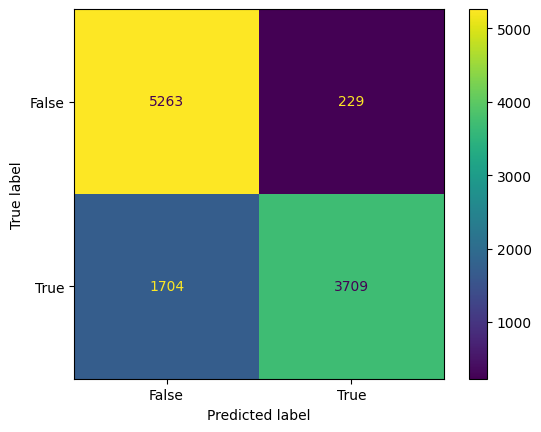

ROC AUC Score: 0.9521621998186502
AP Score: 0.9502482314378414

              precision    recall  f1-score   support

           0       0.76      0.96      0.84      5492
           1       0.94      0.69      0.79      5413

    accuracy                           0.82     10905
   macro avg       0.85      0.82      0.82     10905
weighted avg       0.85      0.82      0.82     10905



In [ ]:
gen_test_data(ft_model)

###7.2 Comparación de los dos modelos con base en las pérdidas y el accuracy

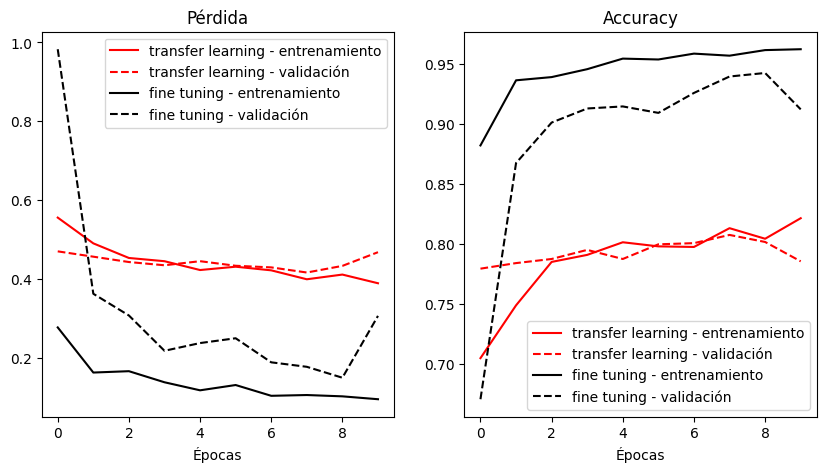

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(hist_tl.history["loss"], "r", label="transfer learning - entrenamiento")
plt.plot(hist_tl.history["val_loss"], "r--", label="transfer learning - validación")
plt.plot(hist_ft.history["loss"], "k", label="fine tuning - entrenamiento")
plt.plot(hist_ft.history["val_loss"], "k--", label="fine tuning - validación")
plt.xlabel("Épocas")
plt.title("Pérdida")
plt.legend()
plt.subplot(122)
plt.plot(hist_tl.history["accuracy"], "r", label="transfer learning - entrenamiento")
plt.plot(hist_tl.history["val_accuracy"], "r--", label="transfer learning - validación")
plt.plot(hist_ft.history["accuracy"], "k", label="fine tuning - entrenamiento")
plt.plot(hist_ft.history["val_accuracy"], "k--", label="fine tuning - validación")
plt.xlabel("Épocas")
plt.title("Accuracy")
plt.legend()

### 7.3.Experimentación tomando como modelo base NASNetMobile

###7.3.1 Se instancia el modelo pre-entrenado NASNetMobile

In [ ]:
#Aprendizaje por transferencia
from tensorflow.keras.applications.nasnet  import NASNetMobile

#Llamamos al modelo MobileNet, y no incluimos la capa final del modelo, ya que esta la vamos a construir posteriormente
extractor = NASNetMobile(weights = 'imagenet', include_top = False, input_shape=(224, 224, 3))
extractor.summary()

19993432/19993432 [==============================] - 0s 0us/step
Model: "NASNet"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 stem_conv1 (Conv2D)         (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 stem_bn1 (BatchNormalizati  (None, 111, 111, 32)         128       ['stem_conv1[0][0]']          
 on)                                                                                              
                                                                                                  
 activation (Activation)    

###7.3.2.Se congelan los pesos del modelo Base

In [ ]:
# Congelamos el extractor de características (Transfer Learning), con el fin de solo entrenar los pesos de la capa personalizada
for layer in extractor.layers:
    layer.trainable=False

###7.3.3.Se construyen las capas top del modelo


In [ ]:
# Creamos una capa de pooling
pool = tf.keras.layers.GlobalAveragePooling2D()(extractor.output)

# Agregamos una capa densa
dense1 = tf.keras.layers.Dense(units=32, activation="relu")(pool)

# Agregamos dropout para regularización
drop1 = tf.keras.layers.Dropout(0.2)(dense1)

# Agregamos una capa de salida con una neuroa de salida y utilizamos la función sigmoide, esta última capa se encarga de realizar la clasificación
dense2 = tf.keras.layers.Dense(units=1, activation="sigmoid")(drop1)

# Definimos nuestro modelo de transfer learning
tl_model = tf.keras.models.Model(inputs=[extractor.input], outputs=[dense2])

# Compilamos el modelo, se susa como función de pérdida binary_crossentropy, ya que, vamos a realizar una clasificación binaria
tl_model.compile(loss="binary_crossentropy",
                 optimizer=tf.optimizers.Adam(learning_rate=1e-3),
                 metrics=["accuracy"])

tl_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 stem_conv1 (Conv2D)         (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 stem_bn1 (BatchNormalizati  (None, 111, 111, 32)         128       ['stem_conv1[0][0]']          
 on)                                                                                              
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['stem_bn1[0][0]']        

###7.3.4.Entrenamiento

In [ ]:
#Entrenamos las capas personalizadas del modelo durante 10 épocas
# Definimos el callback
best_callback = tf.keras.callbacks.ModelCheckpoint(filepath="transfer_learning_netmobile.h5",
                                                   monitor="val_loss",
                                                   verbose=True,
                                                   save_best_only=True,
                                                   save_weights_only=True,
                                                   mode="min")
# Entrenamos el modelo
hist_tl = tl_model.fit(x=train_data,
                       validation_data = valid_data,
                       epochs=10,
                       steps_per_epoch=128,
                       callbacks=[best_callback],
                       validation_steps=128)

Epoch 1/10
128/128 [==============================] - ETA: 0s - loss: 0.6235 - accuracy: 0.6487
Epoch 1: val_loss improved from inf to 0.54746, saving model to transfer_learning_netmobile.h5
128/128 [==============================] - 92s 565ms/step - loss: 0.6235 - accuracy: 0.6487 - val_loss: 0.5475 - val_accuracy: 0.7217
Epoch 2/10
128/128 [==============================] - ETA: 0s - loss: 0.5586 - accuracy: 0.7063
Epoch 2: val_loss improved from 0.54746 to 0.54191, saving model to transfer_learning_netmobile.h5
128/128 [==============================] - 59s 463ms/step - loss: 0.5586 - accuracy: 0.7063 - val_loss: 0.5419 - val_accuracy: 0.7327
Epoch 3/10
128/128 [==============================] - ETA: 0s - loss: 0.5583 - accuracy: 0.7063
Epoch 3: val_loss did not improve from 0.54191
128/128 [==============================] - 59s 458ms/step - loss: 0.5583 - accuracy: 0.7063 - val_loss: 0.5466 - val_accuracy: 0.7224
Epoch 4/10
128/128 [==============================] - ETA: 0s - loss:

###7.3.5.Evaluación

10905/10905 [==============================] - 289s 26ms/step
[[4126 1366]
 [2148 3265]]


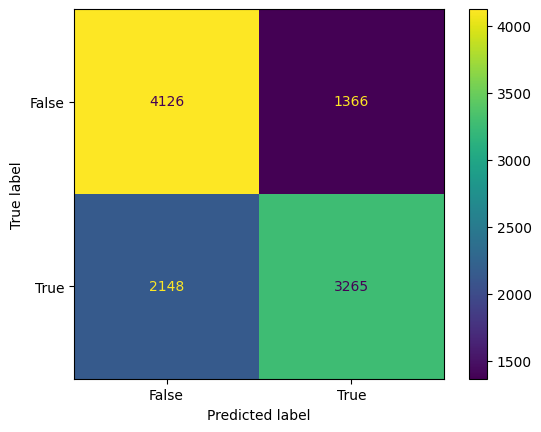

ROC AUC Score: 0.7536201322138754
AP Score: 0.7313969958418527

              precision    recall  f1-score   support

           0       0.66      0.75      0.70      5492
           1       0.71      0.60      0.65      5413

    accuracy                           0.68     10905
   macro avg       0.68      0.68      0.68     10905
weighted avg       0.68      0.68      0.68     10905



In [ ]:
# Cargamos el mejor modelo
tl_model.load_weights("transfer_learning_netmobile.h5")

gen_test_data(tl_model)